In [1]:
import pandas as pd
import numpy as np
import kagglehub
import matplotlib.pyplot as plt
import seaborn as sns
import re

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
data = pd.read_csv("/Users/gavinpryor/.cache/kagglehub/datasets/sobhanmoosavi/us-accidents/versions/13/US_Accidents_March23.csv")

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [4]:
data.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day


In [5]:
data.columns

Index(['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat',
       'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description',
       'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [6]:
# drop unnessecary columns
cleaned = data.drop(columns={
    'ID',
    'Source',
    'End_Lat',
    'End_Lng',
    'End_Time',
    'Distance(mi)',
    'Description',
    'Street',
    'City',
    'Country',
    'County',
    'State',
    'Zipcode',
    'Country',
    'Timezone',
    'Airport_Code',
    'Weather_Timestamp',
    'Amenity',
    'Civil_Twilight',
    'Nautical_Twilight',
    'Astronomical_Twilight'
})

In [7]:
cleaned.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset
0,3,2016-02-08 05:46:00,39.865147,-84.058723,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night
1,2,2016-02-08 06:07:59,39.928059,-82.831184,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night
2,2,2016-02-08 06:49:27,39.063148,-84.032608,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,True,False,Night
3,3,2016-02-08 07:23:34,39.747753,-84.205582,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night
4,2,2016-02-08 07:39:07,39.627781,-84.188354,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,True,False,Day


In [8]:
cleaned.isnull().sum()

Severity                   0
Start_Time                 0
Start_Lat                  0
Start_Lng                  0
Temperature(F)        163853
Wind_Chill(F)        1999019
Humidity(%)           174144
Pressure(in)          140679
Visibility(mi)        177098
Wind_Direction        175206
Wind_Speed(mph)       571233
Precipitation(in)    2203586
Weather_Condition     173459
Bump                       0
Crossing                   0
Give_Way                   0
Junction                   0
No_Exit                    0
Railway                    0
Roundabout                 0
Station                    0
Stop                       0
Traffic_Calming            0
Traffic_Signal             0
Turning_Loop               0
Sunrise_Sunset         23246
dtype: int64

In [9]:
numeric = [
    'Severity',
    'Start_Lat',
    'Start_Lng',
    'Temperature(F)',
    'Wind_Chill(F)',
    'Humidity(%)',
    'Pressure(in)',
    'Visibility(mi)',
    'Wind_Speed(mph)',
    'Precipitation(in)'
]

categorical = [
    'Wind_Direction',
    'Weather_Condition',
    'Bump',
    'Crossing',
    'Give_Way',
    'Junction',
    'No_Exit',
    'Railway',
    'Roundabout',
    'Station',
    'Stop',
    'Traffic_Calming',
    'Traffic_Signal',
    'Turning_Loop',
    'Sunrise_Sunset'
]

datetime = [
    'Start_Time'
]

In [10]:
# handle nulls
for col in numeric:
    cleaned[col] = cleaned[col].fillna(cleaned[col].median())

for col in categorical:
    cleaned[col] = cleaned[col].fillna('Unknown')

### Remove outliers or weird values

In [11]:
# only keep lat and lng within the usa
cleaned = cleaned[(cleaned['Start_Lat'].between(20, 50)) & (cleaned['Start_Lng'].between(-130, -60))]

# keep possible weather values
cleaned = cleaned[(cleaned['Temperature(F)'] > -50) & (cleaned['Temperature(F)'] < 130)]
cleaned = cleaned[(cleaned['Visibility(mi)'] <= 50)]
cleaned = cleaned[(cleaned['Wind_Speed(mph)'] < 120)]

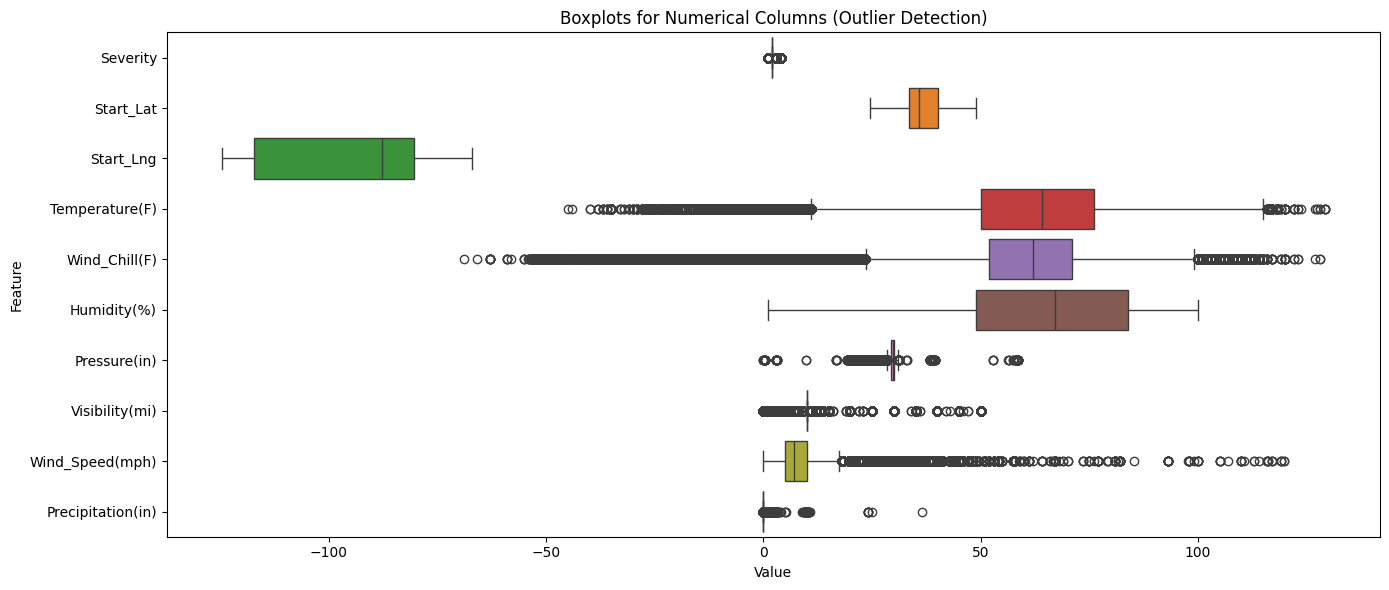

In [12]:
# plot numeric features to check for outliers
plt.figure(figsize=(14, 6))
sns.boxplot(data=cleaned[numeric], orient='h', showfliers=True)

plt.title("Boxplots for Numerical Columns (Outlier Detection)")
plt.xlabel("Value")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [13]:
# handle duplicates
cleaned = cleaned.drop_duplicates()

In [14]:
for col in categorical:
    print(f"\n--- {col} ---")
    print(cleaned[col].value_counts(dropna=False))


--- Wind_Direction ---
Wind_Direction
CALM        900270
S           394640
SSW         368066
Calm        366871
WNW         359569
W           358656
NW          350608
SW          348945
WSW         337972
SSE         332620
NNW         316411
N           287478
SE          279115
E           256821
ESE         252609
NE          246039
ENE         243828
NNE         243704
VAR         234953
South       176513
Unknown     164275
West        163849
North       152665
Variable    113466
East        103017
Name: count, dtype: int64

--- Weather_Condition ---
Weather_Condition
Fair                                   2388412
Mostly Cloudy                           967654
Clear                                   804745
Cloudy                                  765314
Partly Cloudy                           666858
Overcast                                381036
Light Rain                              337374
Scattered Clouds                        203767
Unknown                                

In [15]:
def clean_weather_condition(data, col='Weather_Condition'):
    s = (
        data[col].fillna('Unknown')
        .astype(str)
        .str.strip()
    )
    s = s.str.replace(r'\s+', ' ', regex=True)
    s = s.str.replace(r'\s*/\s*', ' / ', regex=True)  # normalize " / "
    s_lower = s.str.lower()

    # separating out weather conditions
    windy_flag    = s_lower.str.contains(r'\bwindy\b')
    heavy_flag    = s_lower.str.contains(r'\bheavy\b')
    light_flag    = s_lower.str.contains(r'\blight\b')
    thunder_flag = s_lower.str.contains(r'\b(?:t-?storm|thunder)\b', regex=True)


    base = s_lower
    base = base.str.replace(r'\bwindy\b', '', regex=True)
    base = base.str.replace(r'\bheavy\b', '', regex=True)
    base = base.str.replace(r'\blight\b', '', regex=True)
    base = base.str.replace(r'\bpatch(es)? of\b', '', regex=True)
    base = base.str.replace(r'\bshallow\b', '', regex=True)
    base = base.str.replace(r'\bblowing\b', '', regex=True)
    base = base.str.replace(r'\bdrifting\b', '', regex=True)
    base = base.str.replace(r'\blow\b', '', regex=True)
    base = base.str.replace(r'\bnearby\b', '', regex=True)
    base = base.str.replace(r'\bin the vicinity\b', '', regex=True)
    base = base.str.replace(r'\bn/a precipitation\b', 'unknown', regex=True)

    # collapse slashes to spaces after removals
    base = base.str.replace(r'\s*/\s*', ' ', regex=True)
    base = base.str.replace(r'\s+', ' ', regex=True).str.strip()

    # reduce the number of categories
    def to_category(txt: str) -> str:
        if txt in ('unknown', ''):
            return 'Unknown'
        if re.search(r'\b(wintry mix|rain and snow|snow and rain|snow and sleet|sleet and snow|freezing drizzle|freezing rain|freezing fog|ice pellets)\b', txt):
            if re.search(r'\b(freezing rain|freezing drizzle|freezing fog|ice pellets)\b', txt):
                return 'Freezing / Ice'
            return 'Wintry Mix'
        if re.search(r'\b(t-?storm|thunderstorm|thunder)\b', txt):
            return 'Thunderstorm'
        if re.search(r'\b(snow grains|snow showers?|snow)\b', txt):
            return 'Snow'
        if re.search(r'\bsleet\b', txt):
            return 'Sleet'
        if re.search(r'\bhail\b', txt):
            return 'Hail'
        if re.search(r'\b(drizzle)\b', txt):
            return 'Drizzle'
        if re.search(r'\b(rain showers?|showers?)\b', txt):
            return 'Rain'
        if re.search(r'\brain\b', txt):
            return 'Rain'
        if re.search(r'\b(fog|mist)\b', txt):
            return 'Fog / Mist'
        if re.search(r'\bhaze\b', txt):
            return 'Haze'
        if re.search(r'\b(smoke)\b', txt):
            return 'Smoke'
        if re.search(r'\b(dust(storm)?|dust whirls?)\b', txt):
            return 'Dust'
        if re.search(r'\b(sand)\b', txt):
            return 'Sand'
        if re.search(r'\bsqualls?\b', txt):
            return 'Squalls'
        if re.search(r'\b(tornado|funnel cloud)\b', txt):
            return 'Tornado'
        if re.search(r'\bovercast\b', txt):
            return 'Overcast'
        if re.search(r'\b(scattered clouds|mostly cloudy|partly cloudy|cloudy)\b', txt):
            return 'Cloudy'
        if re.search(r'\b(clear|fair)\b', txt):
            return 'Clear'
        if re.search(r'\b(volcanic ash)\b', txt):
            return 'Other'
        return 'Other'

    cleaned_cat = base.apply(to_category)

    # intensity of weather
    intensity = np.where(heavy_flag, 'Heavy',
                  np.where(light_flag, 'Light', 'Normal'))

    out = data.copy()
    out['Weather_Clean'] = cleaned_cat
    out['Weather_Windy'] = windy_flag.astype(int)
    out['Weather_Thunder'] = thunder_flag.astype(int)
    out['Weather_Intensity'] = intensity.astype(str)
    return out

In [16]:
cleaned = clean_weather_condition(cleaned, col='Weather_Condition')

print(cleaned['Weather_Clean'].value_counts())

Weather_Clean
Clear             3226218
Cloudy            2643895
Rain               471663
Overcast           381036
Unknown            164248
Snow               151181
Fog / Mist         104612
Thunderstorm        74187
Haze                74107
Drizzle             27427
Smoke               11971
Wintry Mix          11801
Freezing / Ice       6217
Other                2997
Dust                  695
Sleet                 446
Hail                  120
Squalls                78
Tornado                39
Sand                   22
Name: count, dtype: int64


In [17]:
cleaned.head()

,Severity,Start_Time,Start_Lat,Start_Lng,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Weather_Clean,Weather_Windy,Weather_Thunder,Weather_Intensity
0,3,2016-02-08 05:46:00,39.865147,-84.058723,36.9,62.0,91.0,29.68,10.0,Calm,7.0,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Rain,0,0,Light
1,2,2016-02-08 06:07:59,39.928059,-82.831184,37.9,62.0,100.0,29.65,10.0,Calm,7.0,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,Night,Rain,0,0,Light
2,2,2016-02-08 06:49:27,39.063148,-84.032608,36.0,33.3,100.0,29.67,10.0,SW,3.5,0.00,Overcast,False,False,False,False,False,False,False,False,False,False,True,False,Night,Overcast,0,0,Normal
3,3,2016-02-08 07:23:34,39.747753,-84.205582,35.1,31.0,96.0,29.64,9.0,SW,4.6,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,Night,Cloudy,0,0,Normal
4,2,2016-02-08 07:39:07,39.627781,-84.188354,36.0,33.3,89.0,29.65,6.0,SW,3.5,0.00,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,True,False,Day,Cloudy,0,0,Normal


In [18]:
cleaned.dtypes

Severity               int64
Start_Time            object
Start_Lat            float64
Start_Lng            float64
Temperature(F)       float64
Wind_Chill(F)        float64
Humidity(%)          float64
Pressure(in)         float64
Visibility(mi)       float64
Wind_Direction        object
Wind_Speed(mph)      float64
Precipitation(in)    float64
Weather_Condition     object
Bump                    bool
Crossing                bool
Give_Way                bool
Junction                bool
No_Exit                 bool
Railway                 bool
Roundabout              bool
Station                 bool
Stop                    bool
Traffic_Calming         bool
Traffic_Signal          bool
Turning_Loop            bool
Sunrise_Sunset        object
Weather_Clean         object
Weather_Windy          int64
Weather_Thunder        int64
Weather_Intensity     object
dtype: object

In [19]:
# change to datetime
cleaned['Start_Time'] = pd.to_datetime(cleaned['Start_Time'], format='mixed', errors='coerce')

### EDA

/var/folders/nf/xrh18nk57t51yp565kms_f8h0000gn/T/ipykernel_54222/2129745086.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Severity', data=cleaned, palette='Set2')


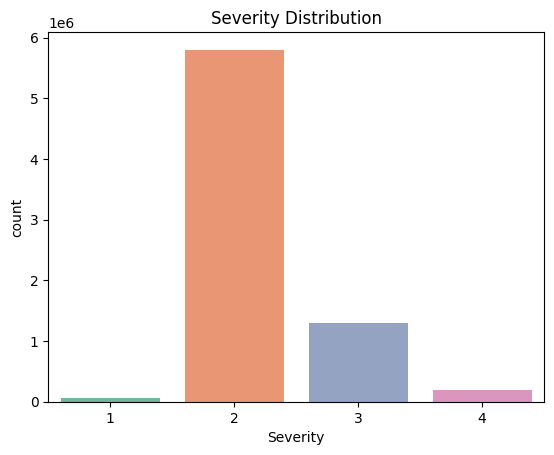

Severity
2    78.877214
3    17.545478
4     2.701198
1     0.876110
Name: proportion, dtype: float64


In [20]:
sns.countplot(x='Severity', data=cleaned, palette='Set2')
plt.title("Severity Distribution")
plt.show()

print(cleaned['Severity'].value_counts(normalize=True) * 100)


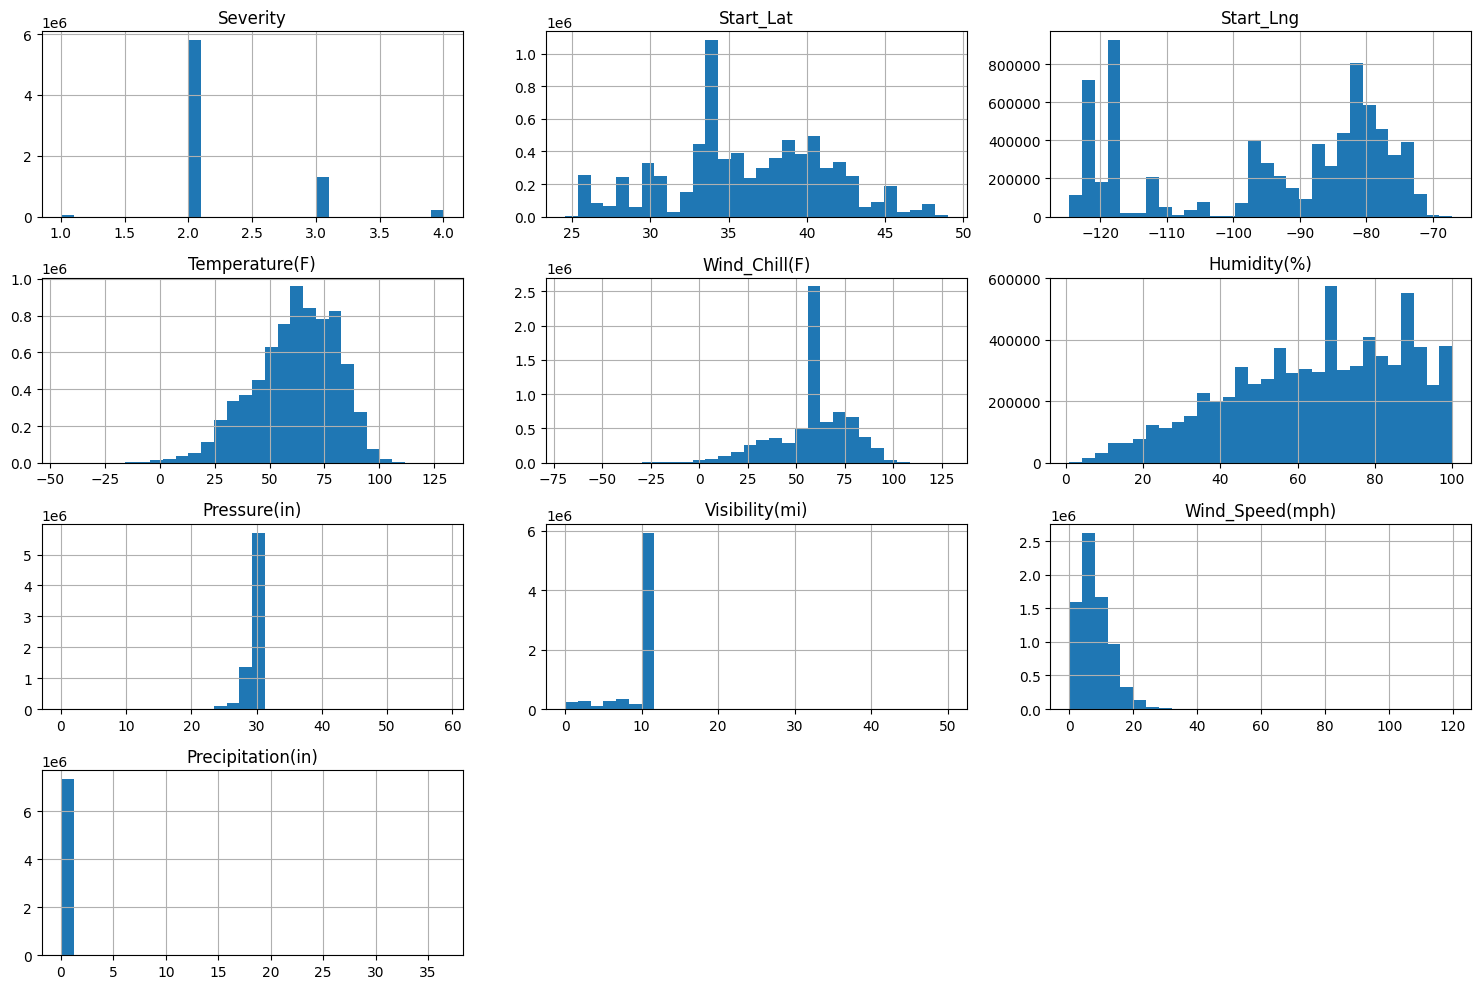

In [21]:
cleaned[numeric].describe()
cleaned[numeric].hist(bins=30, figsize=(15,10))
plt.tight_layout()
plt.show()


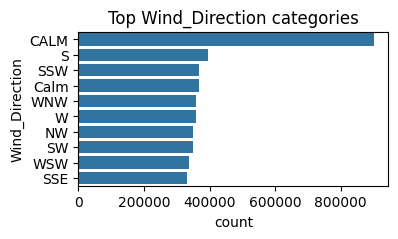

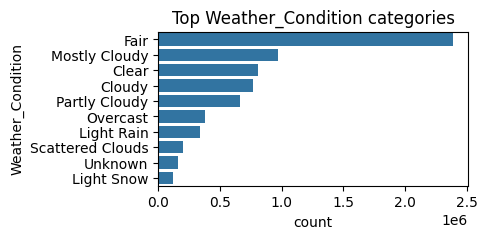

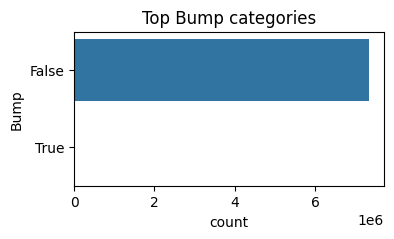

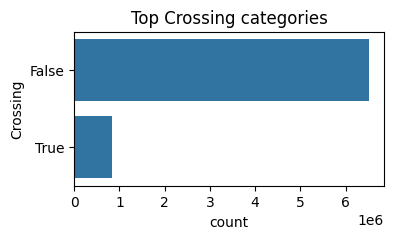

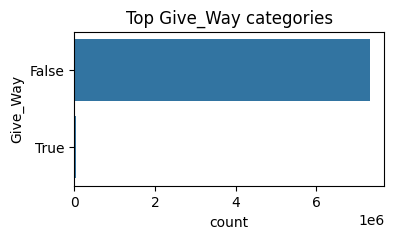

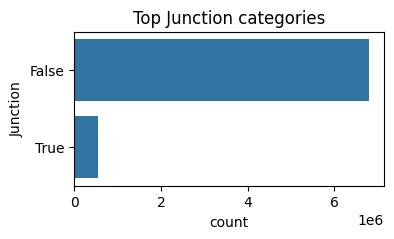

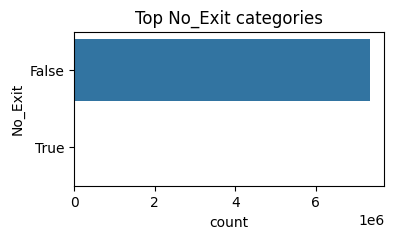

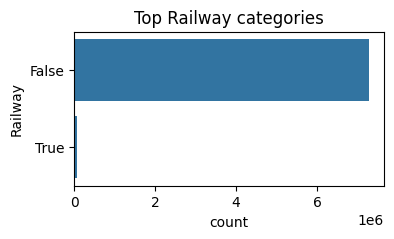

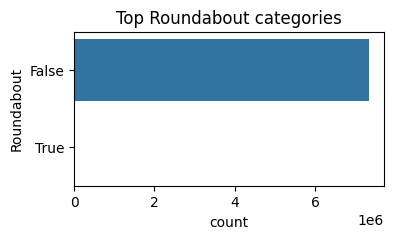

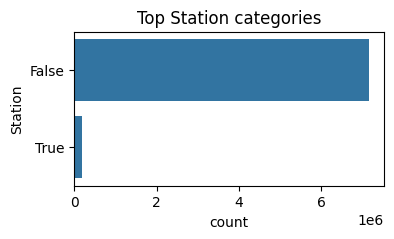

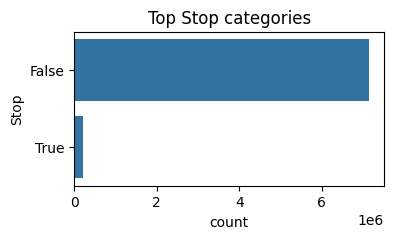

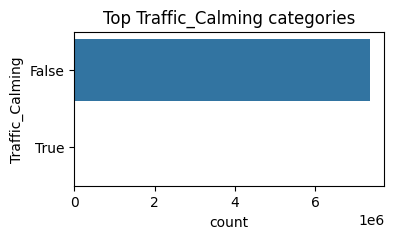

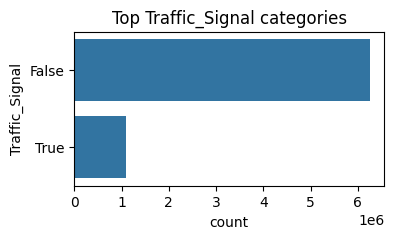

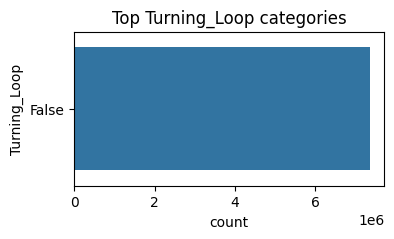

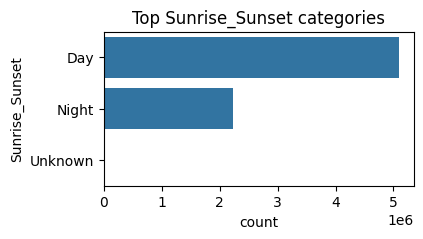

In [22]:
for col in categorical:
    plt.figure(figsize=(4,2))
    sns.countplot(y=col, data=cleaned, order=cleaned[col].value_counts().index[:10])
    plt.title(f"Top {col} categories")
    plt.show()

### Preprocessing and Modeling

In [23]:
# balance classes (right before modeling)
min_count = cleaned['Severity'].value_counts().min()

model_data = cleaned.groupby('Severity', group_keys=False).apply(lambda x: x.sample(min_count, random_state=1))

print(model_data['Severity'].value_counts())

Severity
1    64420
2    64420
3    64420
4    64420
Name: count, dtype: int64


/var/folders/nf/xrh18nk57t51yp565kms_f8h0000gn/T/ipykernel_54222/1877298445.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  model_data = cleaned.groupby('Severity', group_keys=False).apply(lambda x: x.sample(min_count, random_state=1))


In [30]:
numeric = [
    'Start_Lat', 'Start_Lng', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)',
    'Pressure(in)', 'Visibility(mi)', 'Wind_Speed(mph)', 'Precipitation(in)'
]

categorical = [
    'Wind_Direction', 'Weather_Condition', 'Sunrise_Sunset',
    'Weather_Clean', 'Weather_Intensity'
]

boolean = [
    'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
    'Roundabout', 'Station', 'Stop', 'Traffic_Calming',
    'Traffic_Signal', 'Turning_Loop', 'Weather_Windy', 'Weather_Thunder'
]

In [31]:
X = model_data.drop(columns={'Severity'})
y = model_data['Severity']

In [32]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1, stratify=y
)

In [33]:
preprocessor = ColumnTransformer([
    ('num', 'passthrough', numeric),
    ('bool', 'passthrough', boolean),
    ('cat', OneHotEncoder(handle_unknown='ignore', drop='first'), categorical)
])

In [34]:
rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    n_jobs=-1,
    random_state=42,
    #class_weight='balanced' 
)

model = Pipeline([
    ('preprocess', preprocessor),
    ('rf', rf)
])

In [35]:
model.fit(X_train, y_train)

,steps,"[('preprocess', ...), ('rf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('bool', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [36]:
y_pred = model.predict(X_test)

print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))


/Users/gavinpryor/Desktop/AI and Applications/final-project/project/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [1, 3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


Accuracy: 0.579

Classification Report:
               precision    recall  f1-score   support

           1       0.67      0.82      0.74     19326
           2       0.51      0.42      0.46     19326
           3       0.54      0.54      0.54     19326
           4       0.56      0.54      0.55     19326

    accuracy                           0.58     77304
   macro avg       0.57      0.58      0.57     77304
weighted avg       0.57      0.58      0.57     77304


Confusion Matrix:
 [[15843  1609   827  1047]
 [ 3742  8025  3987  3572]
 [ 1985  3244 10507  3590]
 [ 2082  2875  3983 10386]]


/var/folders/nf/xrh18nk57t51yp565kms_f8h0000gn/T/ipykernel_54222/2813013037.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


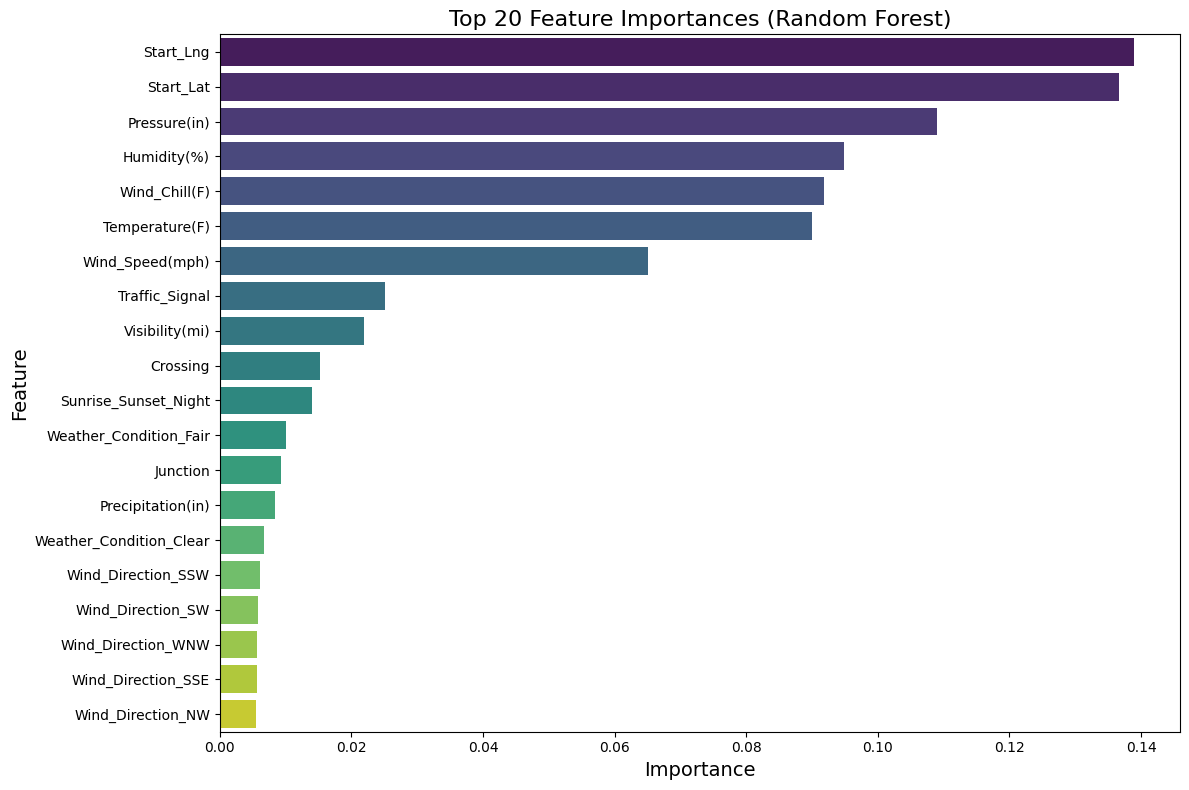

In [37]:
# Get feature names after one-hot encoding
cat_features = model.named_steps['preprocess'] \
    .named_transformers_['cat'] \
    .get_feature_names_out(categorical)

# Combine all column names
feature_names = np.concatenate([numeric, boolean, cat_features])

# Get importances from the random forest
importances = model.named_steps['rf'].feature_importances_

# Create a DataFrame for easy sorting and plotting
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot top 20
plt.figure(figsize=(12, 8))
sns.barplot(
    data=feat_imp.head(20),
    x='Importance',
    y='Feature',
    palette='viridis'
)

plt.title("Top 20 Feature Importances (Random Forest)", fontsize=16)
plt.xlabel("Importance", fontsize=14)
plt.ylabel("Feature", fontsize=14)
plt.tight_layout()
plt.show()
